## DATA IMPORT
To import data using `osiris_utils` you can use either the methods defined in `osiris_utils.data_readers` (this will be deprecated) or in `osiris_utils.data` (recommended). The methods in `osiris_utils.data` are object oriented and allow for more flexibility. They also contain the information about the data that is being read, that is obtained directly from the OSIRIS `.h5` grid file output.

In [1]:
import osiris_utils as ou
import numpy as np
import matplotlib.pyplot as plt

/Users/joaobiu/Developer/utils_osiris/osiris_utils/data.py:84: SyntaxWarning: invalid escape sequence '\q'
  '''


### Using `osiris_utils.data_readers`:
- `open1D` for 1D grid data
- `open2D` for 2D grid data

The returns are `numpy` arrays with the axis as `np.linspace` and data.

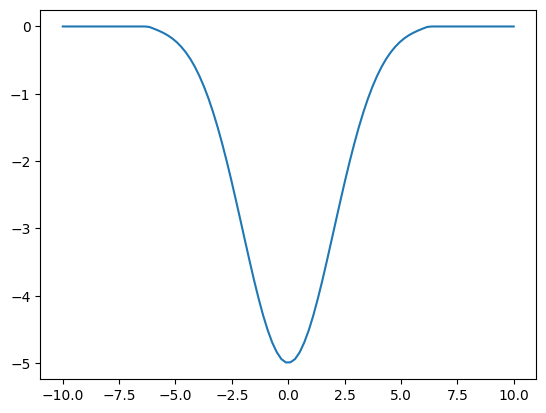

In [2]:
# 1D
x, data1D, _ = ou.open1D('files/x1-electrons-000001.h5')

plt.plot(x, data1D)

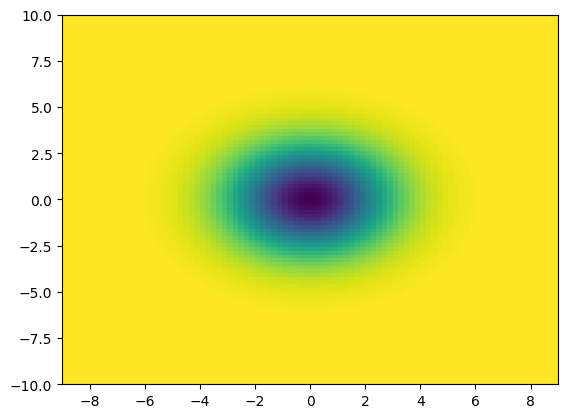

In [3]:
# 2D

x, y, data2D, _ = ou.open2D('files/x1x2-electrons-000001.h5')

plt.imshow(data2D, aspect='auto', origin='lower', extent=[x.min(), x.max(), y.min(), y.max()])

In [25]:
data = ou.OsirisGridFile('files/x1x2-electrons-000001.h5')

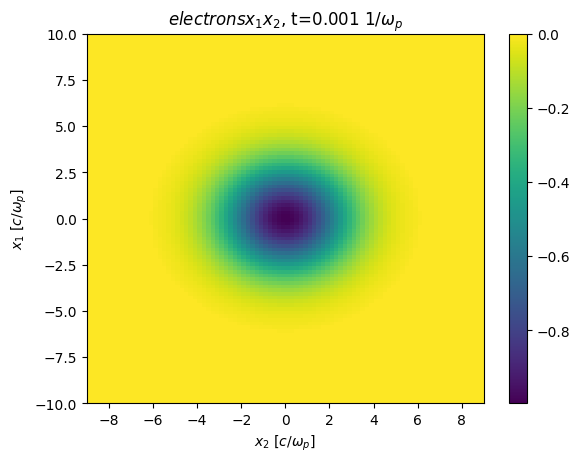

In [30]:
plt.imshow(data.data.T, aspect='auto', origin='lower', extent=[data.grid[0][0], data.grid[0][-1], data.grid[1][0], data.grid[1][-1]])
plt.xlabel(rf"${data.axis[0]["long_name"]}$ [${data.axis[0]["units"]}$]")
plt.ylabel(rf"${data.axis[1]["long_name"]}$ [${data.axis[1]["units"]}$]")
plt.title(rf"${data.label}$, t={data.time[0]} ${data.time[1]}$")
plt.colorbar()
